# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# Fill this in based on where the training and testing data are saved
training_file = "../data/train.p"
validation_file="../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max() - y_train.min() + 1 # assuming the labels are consecutive numbers either starting from 1 or 0

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
#open the csv file
label_name=pd.read_csv("signnames.csv",delimiter=',')

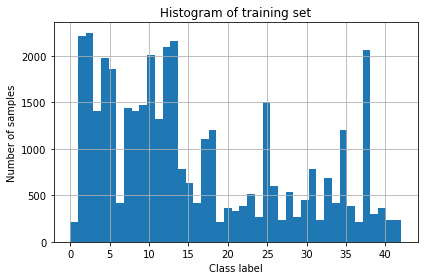

number of images for the max image class is : 2250.0


In [6]:
#look at how the data is organized with a histogram. 
fig, ax = plt.subplots()
freq_elem, bins, patches = ax.hist(train['labels'], n_classes, histtype='bar')
ax.set_xlabel('Class label')
ax.set_ylabel('Number of samples')
ax.set_title('Histogram of training set')
ax.set_xticks(np.arange(0,n_classes-1,5))
fig.tight_layout()
plt.grid(True)
plt.show()
max_data_points=max(freq_elem)
print('number of images for the max image class is : '+str(max_data_points))


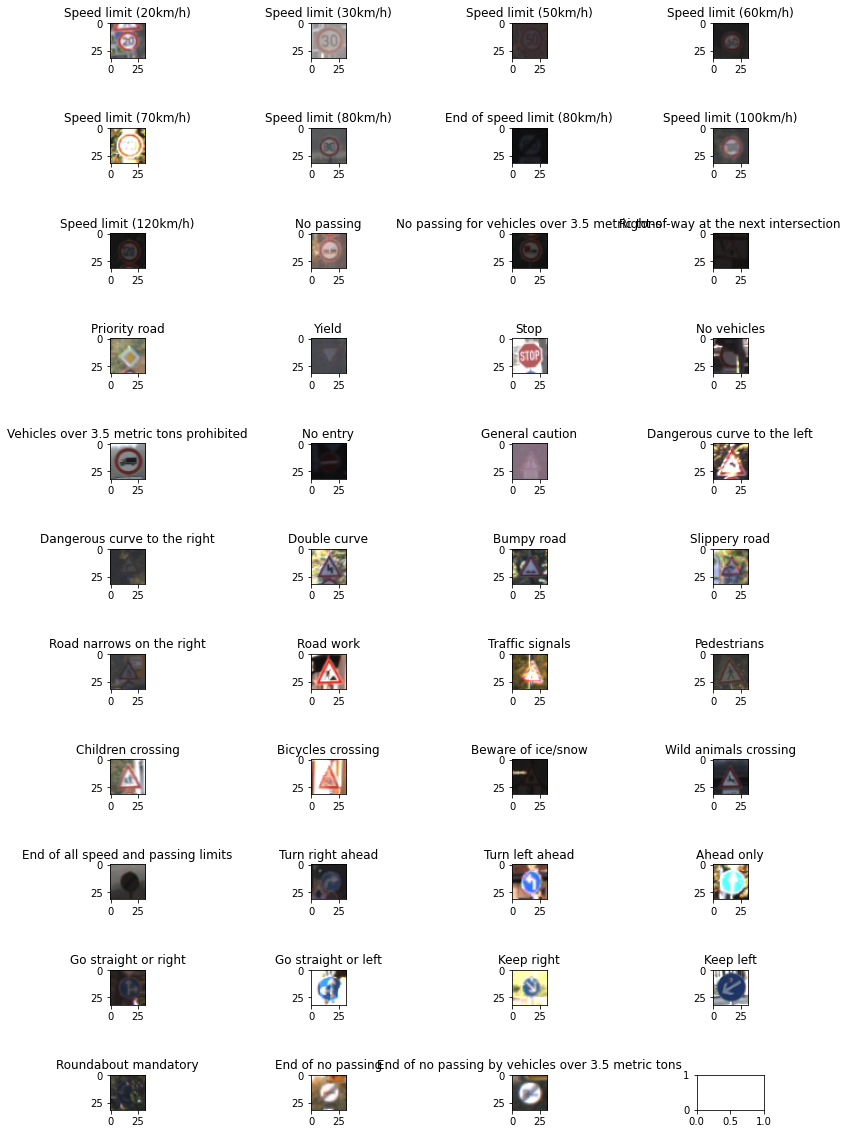

In [7]:
prev=-1
fig,ax=plt.subplots(nrows=11, ncols=4,figsize=(12,20)) # we have 43 images one per class to display
plt.subplots_adjust(hspace=2,wspace=2)
r=0
c=0
for x,y in zip(X_train,y_train):
    if(c>3):
        c=0
        r=r+1
    if prev!=y:
        ax[r, c].imshow(x)
        ax[r, c].set_title(label_name.loc[label_name['ClassId'] == y, 'SignName'].iloc[0])
        prev=y
        c=c+1

## Observations

### Quality of dataset
As observed from the histogram, some classes have very few data.  
This will make the model perform poorly on test set containing these classes.
Hence, augmentation needs to be done so that this histogram chart will look like one single rectangle i.e. all bins having almost same values.

### Quality of images
The images are of varying brightness. 
Some are hard to pick features from as they require some preprocessing like auto brightness or contrast corrections.
One thing that is important is that the images have colors. This could be an important feature. If an image of an arrow with blue filled circle is not quite visible then there may be very less distinguishable features to a speed limit with no numbers visible thus classifying the wrong class. Hence, it was decided not to lose the colors away at once with a grayscale conversion. Since, it adds to performance as single channel means less arithmetic operations and matmul operations, it will not be neglected and will nevertheless be explored.


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def normalize(data):
    minData = np.min(data)
    maxData = np.max(data)
    data = (data - minData)/(maxData-minData)
    return np.reshape(data, (32,32,1))

# Convert to grayscale
def grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return np.reshape(gray, (32,32,1))

# Histogram equalization to improve contrast
def histogram_equalize(image):
    equ = cv2.equalizeHist(image)
    return np.reshape(equ, (32,32,1))

def preprocess(data):
    data=grayscale(data)
    data=histogram_equalize(data)
    return np.reshape(data, (32,32,1))

'''
CNNs are translation invariant but are not rotation, shear invariant, 
this means there can be signs that are slightly tilted or skewed on the poles that the CNNs will fail to pick, 
hence, tilted signs could be useful to augment data. sensible tilt values like till -- degrees shall be tried.  
references : 
https://jvgemert.github.io/pub/kayhanCVPR20translationInvarianceCNN.pdf
https://stackoverflow.com/questions/40952163/are-modern-cnn-convolutional-neural-network-as-detectnet-rotate-invariant/40953261#40953261
'''
def transform(img,a_range,s_range):
    '''
    @brief takes in an image and does some transforms on it.
    @param[in] : Image
    @param[in] : a_range: Range of angles for rotation in degrees
    @param[in] : s_range: Range of values to apply affine transform to
    A Random uniform distribution is used to generate different parameters for transformation
    '''
    # Rotation
    ang_rot = np.random.uniform(a_range)-a_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+s_range*np.random.uniform()-s_range/2
    pt2 = 20+s_range*np.random.uniform()-s_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    return img

Text(0.5, 1.0, 'auto contrast, equalized Image')

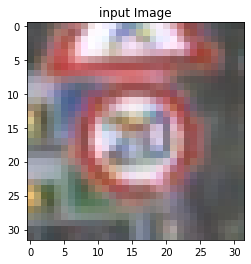

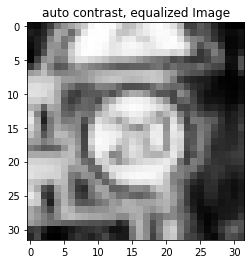

In [9]:
plt.imshow(X_train[0])
plt.title('input Image')
plt.figure()
dat=preprocess(X_train[0]).squeeze()
plt.imshow(dat,cmap='gray')
plt.title('auto contrast, equalized Image')

# Data Augmentation

In [10]:
'''
find number of elements in each class.
this will be used to determine start 
point and randomly pick images to create
an augmented dataset
'''
count = 0
yprev=y_train[0]
sizes=[]
for y in y_train:
    if(yprev!=y):
        sizes.append(count)
        yprev=y
        count=0
    count+=1
sizes.append(count)

In [11]:
'''
this code section will augment data
'''
X_train = X_train.tolist()
y_train = y_train.tolist()
startindxs = (np.cumsum(sizes)-sizes)
iters=0
for n,s in zip(sizes,startindxs):
    n_augment = int(max_data_points - n)
    for i in range(n_augment):
        index = int(s+int(np.random.uniform(n-1)))
        image = X_train[index]
        image = np.array(image,dtype=np.uint8)
        img = transform(image,20,10)
        X_train.append(img)
        y_train.append(y_train[index])
    iters+=1
X_train = np.array(X_train,dtype=np.uint8)
y_train = np.array(y_train,dtype=np.uint8)

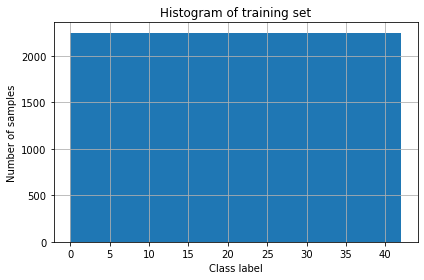

number of images for the max image class is : 2250.0


In [12]:
#look at how the new augmented dataset is organized with a histogram. 
fig, ax = plt.subplots()
freq_elem, bins, patches = ax.hist(y_train, n_classes, histtype='bar')
ax.set_xlabel('Class label')
ax.set_ylabel('Number of samples')
ax.set_title('Histogram of training set')
ax.set_xticks(np.arange(0,n_classes-1,5))
fig.tight_layout()
plt.grid(True)
plt.show()
max_data_points=max(freq_elem)
print('number of images for the max image class is : '+str(max_data_points))

In [21]:
with open('../data/augment.p', 'wb') as handle:
    pickle.dump({'features': X_train, 'labels': y_train}, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:
with open('../data/augment.p', 'rb') as handle:
    train = pickle.load(handle)
X_train, y_train = train['features'], train['labels']

As explained before, the histogram is now one large rectangle.
it has 2010 elements i.e. num of individual largest label size.  

In [27]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max() - y_train.min() + 1 # assuming the labels are consecutive numbers starting from 0

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 96750
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


In [28]:
# preprocess stuff first in uint8
X_train_norm=[]
for indx in range(n_train):
    X_train_norm.append(preprocess(X_train[indx].astype('uint8')))
X_val_norm=[]    
for indx in range(n_validation):
    X_val_norm.append(preprocess(X_valid[indx].astype('uint8')))
X_test_norm=[]
for indx in range(n_test):
    X_test_norm.append(preprocess(X_test[indx].astype('uint8')))

# normalize 
for indx in range(n_train):
    X_train_norm[indx]=normalize(X_train_norm[indx].astype('float32'))
for indx in range(n_validation):
    X_val_norm[indx]=normalize(X_val_norm[indx].astype('float32'))
for indx in range(n_test):
    X_test_norm[indx]=normalize(X_test_norm[indx].astype('float32'))

### Model Architecture

In [49]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#from tensorflow.layers import flatten #no longer supported in tf>2.0
from sklearn.utils import shuffle

Instructions for updating:
non-resource variables are not supported in the long term


In [50]:
### Define your architecture here.
def LeNet(x,n_c):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    #N = 32
    print("in :" + str(x.shape))
    # Layer 1: Convolutional. Input = NxNx3. Output = NxNx6.
    # [filter_height, filter_width, in_channels, out_channels]
    kernel1 = tf.Variable(tf.compat.v1.random.truncated_normal((5, 5, 1, 6), mean=mu, stddev=sigma, dtype=tf.float32))
    bias1 = tf.Variable(tf.zeros(6))
    layer1 = tf.nn.conv2d(x, kernel1, padding='VALID', strides=[1, 1, 1, 1],name = 'convol1') + bias1
    # Activation.
    layer1 = tf.nn.relu(layer1)
    # Pooling. Input = NxNx6. Output = N/2 x N/2 x 6.
    layer1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    print("l1 :" + str(layer1.shape))
    # Layer 2: Convolutional. Output = 10x10x16.
    kernel2 = tf.Variable(tf.compat.v1.random.truncated_normal((5, 5, 6, 16), mean=mu, stddev=sigma, dtype=tf.float32))
    bias2 = tf.Variable(tf.zeros(16))
    layer2 = tf.nn.conv2d(layer1, kernel2, padding='VALID', strides=[1, 1, 1, 1],name = 'convol2') + bias2
    # Activation.
    layer2 = tf.nn.relu(layer2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    print("l2 :" + str(layer2.shape))
    # Flatten. Input = 8x8x16. Output = 1024.
    fc1_in = tf.reshape(layer2, [tf.shape(layer2)[0], -1])
    '''
        dropouts are advised to be used in the dense layers and not in conv layers.
    '''
    print("fc1 :" + str(fc1_in.shape))
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.compat.v1.random.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1_in, fc1_W) + fc1_b
    # Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # Layer 2: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.compat.v1.random.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_c.
    fc3_W = tf.Variable(tf.compat.v1.random.truncated_normal(shape=(84, n_c), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_c))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [51]:
### Train your model here.

EPOCHS = 50
BATCH_SIZE = 128
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.compat.v1.placeholder(tf.int32, (None))
keep_prob = tf.compat.v1.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x,43)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.compat.v1.train.Saver()


in :(?, 32, 32, 1)
l1 :(?, 14, 14, 6)
l2 :(?, 5, 5, 16)
fc1 :(?, ?)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [52]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss*len(batch_x))
    return (total_loss/num_examples),(total_accuracy / num_examples)


In [53]:
X_train_norm, y_train = shuffle(X_train_norm, y_train)
one_hot_y_train = tf.one_hot(y_train,n_classes)
train_accuracies=[]
valid_accuracies=[]
train_loss_=[]
valid_loss=[]
#Training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.7})
        train_loss, train_accuracy = evaluate(X_train_norm,y_train)
        validation_loss, validation_accuracy = evaluate(X_val_norm, y_valid)
        print("EPOCH {} ...".format(i + 1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        train_accuracies.append(train_accuracy)
        valid_accuracies.append(validation_accuracy)
        train_loss_.append(train_loss)
        valid_loss.append(validation_loss)
        print("==============================")

    saver.save(sess, './lenet50')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.632
Validation Accuracy = 0.802
Model saved


INFO:tensorflow:Restoring parameters from ./lenet50
Test Accuracy = 0.934


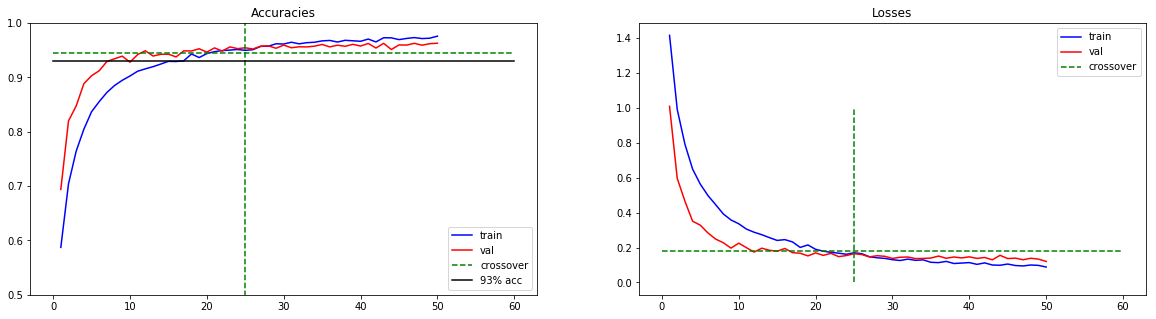

In [41]:
#Evaluation
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_loss, test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
x_pl=np.linspace(1,EPOCHS,EPOCHS)
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(20,5)) 
ax[ 0].plot(x_pl,train_accuracies,'b',x_pl,valid_accuracies,'r',
            [25,25],[0,1],'g--',
            [0,60],[0.930,0.930],'k-',
            [0,60],[0.945,0.945],'g--')
ax[ 0].set_title('Accuracies')
ax[ 0].legend(('train','val','crossover','93% acc'))
ax[ 0].set_ylim(0.5,1.0)
ax[ 1].plot(x_pl,train_loss_,'b',x_pl,valid_loss,'r',
            [25,25],[0,1],'g--',
            [0,60],[0.18,0.18],'g--')
ax[ 1].set_title('Losses')
ax[ 1].legend(('train','val','crossover'))
#fig.savefig('results_50_Epochs.png')
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# inference
The model was run for 50 Epochs to see how well the accuracies and losses from training and validation look.  
with 
- a learning rate of 0.001 many iterations on padding and strides in the convolution layers were done.  
- The model performed the best when the convolution layers had VALID padding and Max pooling layers had SAME padding.  
- the optimizer was ADAM (untouched)  
- the introduction of rotation and skewing of images along with the contrast correction proved to solve the issue of overfitting that was seen earlier with a low validation and high training accuracy. 
- the average difference in the training and validation accuracies were +/- 2% suggesting that the model was fitting quite well without any observable overfitting that was previously observed. 

40 epochs was tried in order to test the effect of early stopping on the test data set.

![40_Epochs](results_40_Epochs.png)

50 epochs was tried to keep pushing the training to see any notable fluctuations in validation accuracy 
or signs of overfitting.

![50_Epochs](results_50_Epochs.png)

50 Epochs was chosen due to the acceptable margin of difference in train and validation accuracy and better test set accuracy.
The final performance of the model was found to be (considering the last 5 epochs)

| Epochs | training accuracy | validation accuracy | test set accuracy|  
|:------:|:-----------------:|:-------------------:|:----------------:|  
|   30   |         95        |         94.4        |       92.3       |
|   40   |         96.5      |         95.3        |       92.7       |
|   50   |         97.66     |         96.3        |       93.4       |

anything above 50 epochs did not yield significant changes in the validation and testing accuracy. However, training accuracy was notably improved which indicated that more runs were leading to clear overfitting and hence was not pursued.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [42]:
### Load the images and plot them here.
animal_cross=plt.imread('deer.jpg')
prio_rd=plt.imread('priority-road.jpg')
stop_sgn=plt.imread('stop.jpg')
speed_limit=plt.imread('speed_limit.jpg')
give_way=plt.imread('give_way.jpg')
turn_right=plt.imread('turn_right.jpg')
roundabt=plt.imread('roundabout.jpg')
### Feel free to use as many code cells as needed.
animal_cross_32 = cv2.resize(animal_cross,(32,32),interpolation=cv2.INTER_AREA)
prio_rd_32 = cv2.resize(prio_rd,(32,32),interpolation=cv2.INTER_AREA)
stop_sgn_32 = cv2.resize(stop_sgn,(32,32),interpolation=cv2.INTER_AREA)
speed_limit_32 = cv2.resize(speed_limit,(32,32),interpolation=cv2.INTER_AREA)
give_way_32 =  cv2.resize(give_way,(32,32),interpolation=cv2.INTER_AREA)
turn_right_32 = cv2.resize(turn_right,(32,32),interpolation=cv2.INTER_AREA)
roundabt_32 =  cv2.resize(roundabt,(32,32),interpolation=cv2.INTER_AREA)
custom_test=[animal_cross_32,prio_rd_32,stop_sgn_32,speed_limit_32,give_way_32,turn_right_32,roundabt_32]


Text(0.5,1,'32x32')

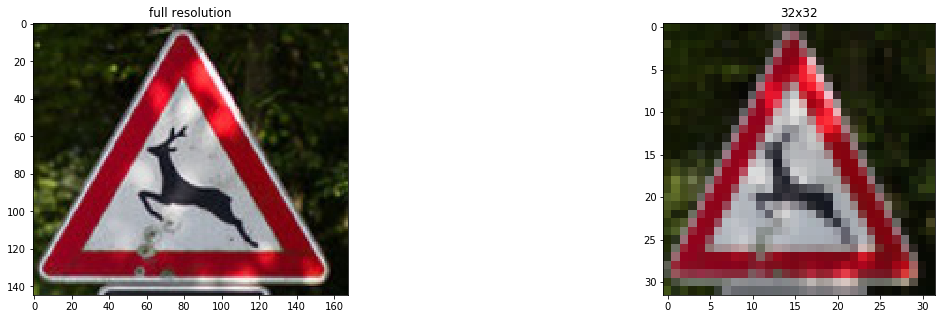

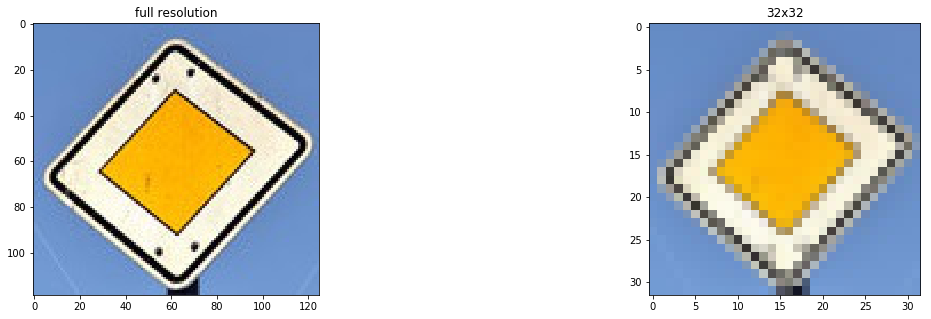

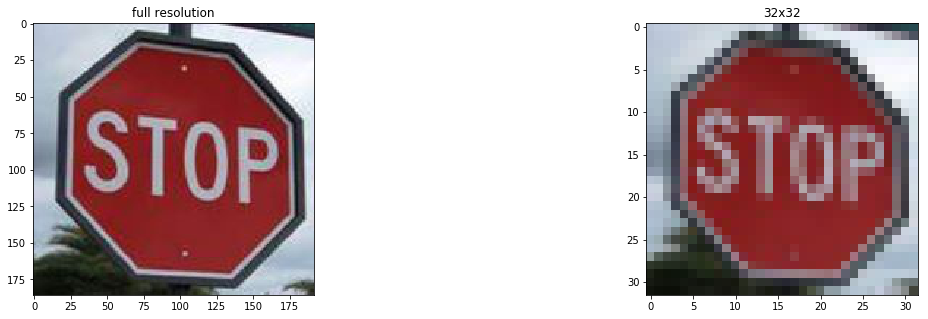

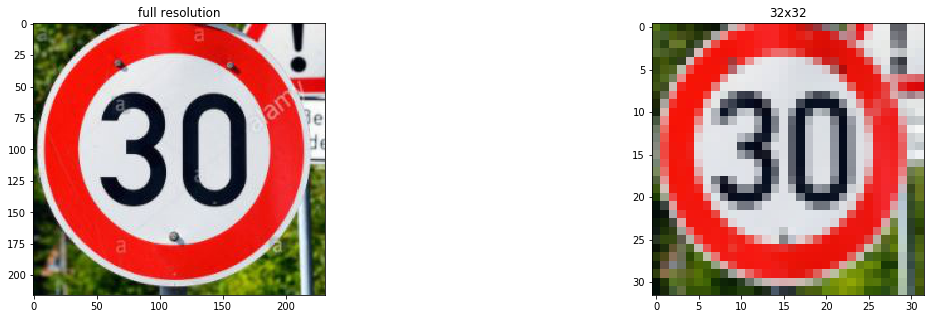

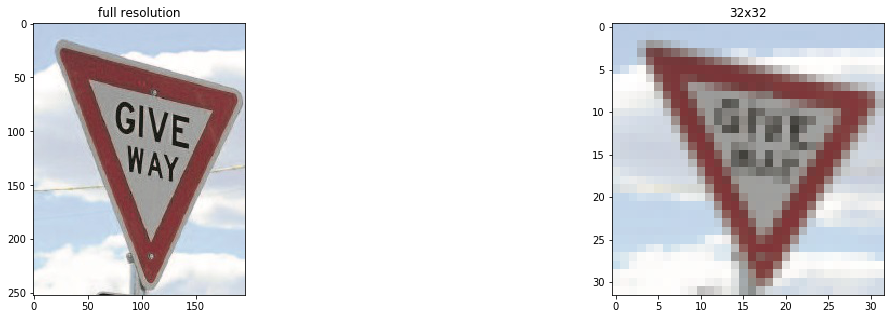

In [43]:
#show some 5 images of the 7 available.
fig,ax=plt.subplots(nrows=1, ncols=2,figsize=(20,5))
ax[0].imshow(animal_cross)
ax[0].set_title('full resolution')
ax[1].imshow(animal_cross_32)
ax[1].set_title('32x32')
fig,ax=plt.subplots(nrows=1, ncols=2,figsize=(20,5))
ax[0].imshow(prio_rd)
ax[0].set_title('full resolution')
ax[1].imshow(prio_rd_32)
ax[1].set_title('32x32')
fig,ax=plt.subplots(nrows=1, ncols=2,figsize=(20,5))
ax[0].imshow(stop_sgn)
ax[0].set_title('full resolution')
ax[1].imshow(stop_sgn_32)
ax[1].set_title('32x32')
fig,ax=plt.subplots(nrows=1, ncols=2,figsize=(20,5))
ax[0].imshow(speed_limit)
ax[0].set_title('full resolution')
ax[1].imshow(speed_limit_32)
ax[1].set_title('32x32')
fig,ax=plt.subplots(nrows=1, ncols=2,figsize=(20,5))
ax[0].imshow(give_way)
ax[0].set_title('full resolution')
ax[1].imshow(give_way_32)
ax[1].set_title('32x32')


In [44]:
assert(len(custom_test)==7)

### Predict the Sign Type for Each Image

In [45]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
for i in range(len(custom_test)):
    custom_test[i]=preprocess(custom_test[i].astype(np.uint8))

In [46]:
label_name

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [47]:
custom_test_norm=[]
for img in custom_test:
    custom_test_norm.append(normalize(img.astype(np.float32)))

In [48]:
#ground truth for the sample set
y_custom_test=[31,12,14,1,13,33,40]

### Analyze Performance

In [49]:
### Calculate the accuracy for these (7) new images. 
### For example, if the model predicted 1 out of 7 signs correctly, it's 14% accurate on these new images.

In [50]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = tf.argmax(logits, 1)
    y_pred = sess.run(prediction, feed_dict={x: custom_test_norm, keep_prob: 1.0})
    
### the accuracy on the test set should be calculated and reported as well.
#test accuracy calculation    
count=0
for y_p,y_t in zip(y_pred,y_custom_test):
    if(y_p==y_t):
        count+=1
count/=7
print('test custom accuracy: '+str(count))

INFO:tensorflow:Restoring parameters from ./lenet50
test custom accuracy: 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [51]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)
    prob = sess.run(softmax, feed_dict={x: custom_test_norm, keep_prob: 1.0})
    top_K = sess.run(tf.nn.top_k(tf.constant(prob), k=5))
    print(top_K)

INFO:tensorflow:Restoring parameters from ./lenet50
TopKV2(values=array([[  5.48681915e-01,   2.03916922e-01,   6.63262829e-02,
          5.95478341e-02,   5.22121005e-02],
       [  1.00000000e+00,   9.90220614e-14,   1.44169361e-14,
          9.91613001e-15,   6.46930858e-15],
       [  4.60462481e-01,   3.71925890e-01,   8.98603424e-02,
          7.60034174e-02,   4.61412594e-04],
       [  9.20229018e-01,   5.20460680e-02,   1.91692337e-02,
          8.24911520e-03,   1.08723842e-04],
       [  9.86332953e-01,   1.26446113e-02,   5.21470327e-04,
          1.73631590e-04,   1.63151912e-04],
       [  9.98155415e-01,   1.83590711e-03,   3.67980965e-06,
          2.53821509e-06,   2.06150276e-06],
       [  9.67147052e-01,   3.24428231e-02,   1.18957811e-04,
          1.01427584e-04,   7.21104152e-05]], dtype=float32), indices=array([[31, 23, 19, 24, 29],
       [12, 38, 40, 35, 15],
       [14, 38, 34, 18, 25],
       [ 1, 40,  0,  4,  5],
       [13, 12, 41, 15,  7],
       [33, 35,

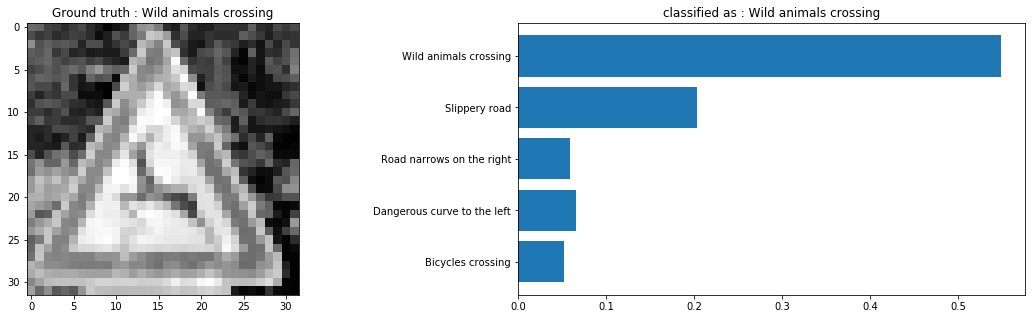

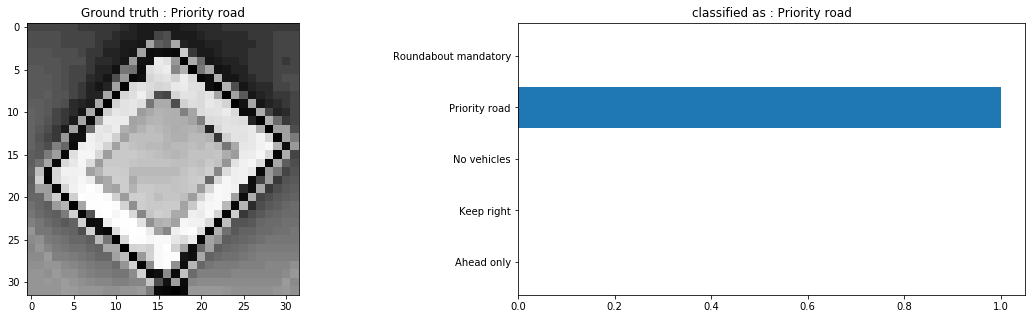

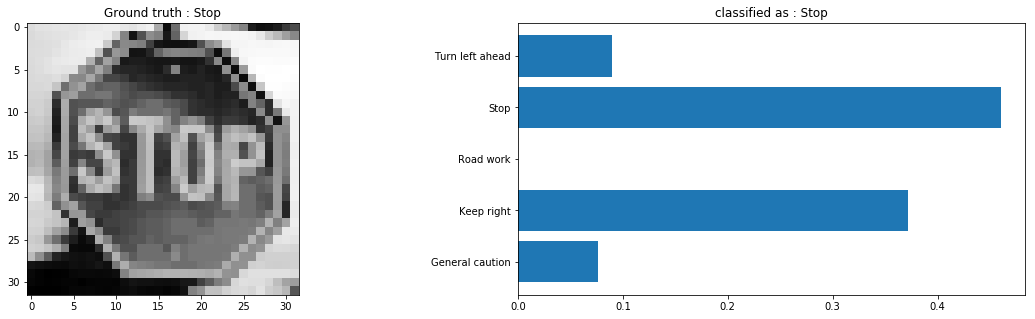

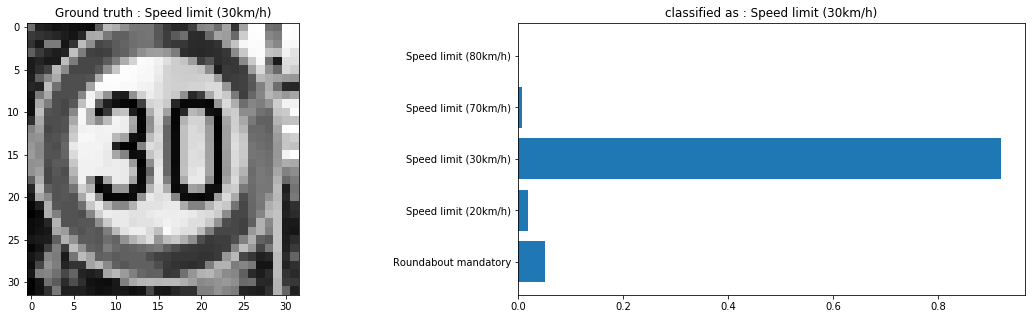

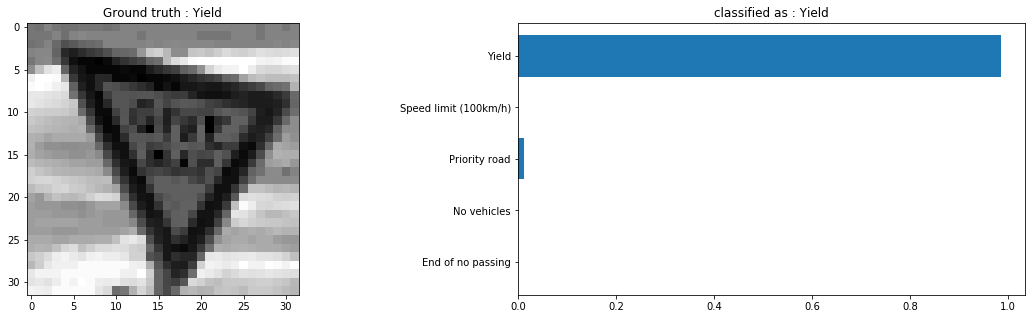

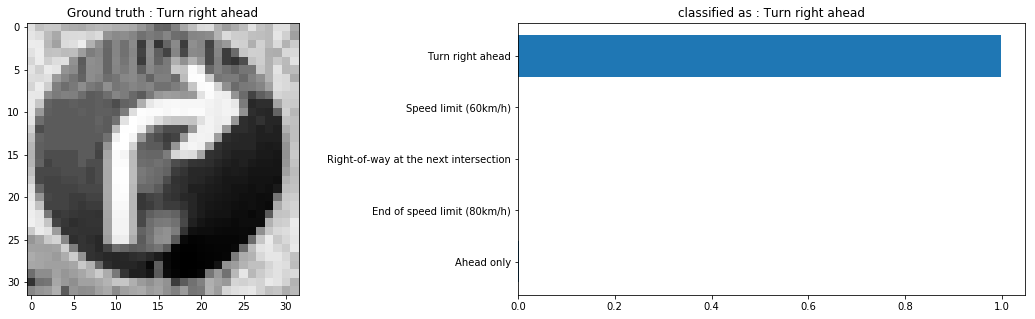

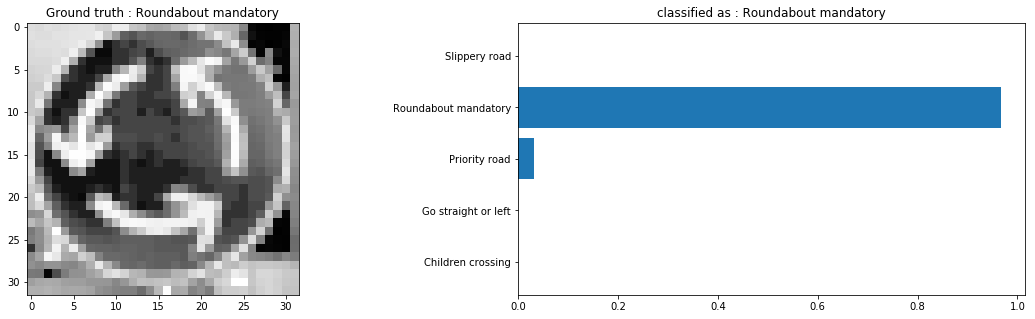

In [52]:
#display a neat visualization

for probs,ind,image,truth in zip(top_K.values,top_K.indices,custom_test,y_custom_test):
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    ax[0].set_title("Ground truth : "+label_name.loc[label_name['ClassId'] == truth , 'SignName'].iloc[0])
    ax[0].imshow(image.squeeze(),cmap='gray')
    strlist=[]
    for i in ind:
        strlist.append(label_name.loc[label_name['ClassId'] == i, 'SignName'].iloc[0])
    ax[1].barh(strlist,probs)
    ax[1].set_title("classified as : "+strlist[0])

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [53]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,keep_prob: 1})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [54]:
image_input = custom_test_norm[3]# taking the 30kmph sign to see features
image_input = np.reshape(image_input, (1, ) + image_input.shape)
print(image_input.shape)

(1, 32, 32, 1)


INFO:tensorflow:Restoring parameters from ./lenet50


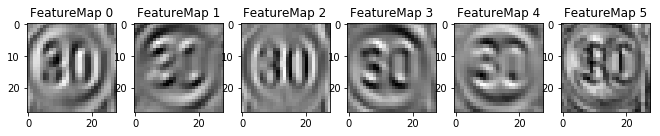

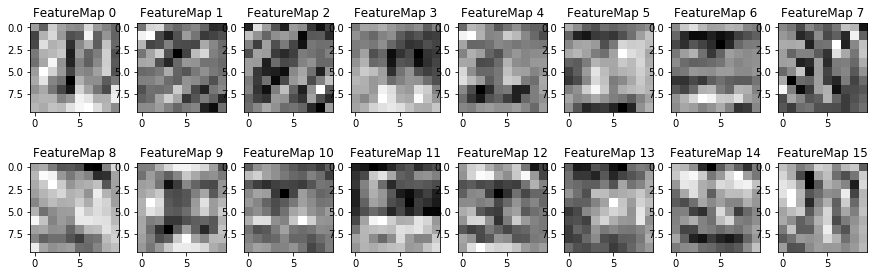

In [55]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./lenet50.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    layer_1 = tf.get_default_graph().get_tensor_by_name("convol1:0")
    layer_2 = tf.get_default_graph().get_tensor_by_name("convol2:0")
    outputFeatureMap(image_input, layer_1, plt_num=1)
    outputFeatureMap(image_input, layer_2, plt_num=2)

In [75]:
#saves an output text file with graph info
saver = tf.train.import_meta_graph('./lenet30')
imported_graph = tf.get_default_graph()
graph_op = imported_graph.get_operations()
with open('output.txt', 'w') as f:
    for i in graph_op:
        f.write(str(i))